In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
Combined_Data = pd.read_csv("Resources/Cleaned CSVs/Combined_Data.csv")
Combined_Data.set_index('Tm', inplace=True)

In [3]:
# Define features set
X = Combined_Data.copy()
X.drop("playoffs", axis=1, inplace=True)
X

,#Bat,#Fld,#P,2B,3B,A,AB,BA,BB9,BB_x,...,SO/W,SO9,SO_x,SO_y,SV,TB,WHIP,WP,cSho,tSho
Tm,,,,,,,,,,,,,,,,,,,,,
Arizona Diamondbacks,49.0,49.0,30.0,259.0,50.0,1686.0,5460.0,0.235,3.2,560.0,...,2.77,8.9,1460.0,1448.0,39.0,2170.0,1.254,69.0,1.0,9.0
Atlanta Braves,58.0,57.0,35.0,314.0,29.0,1439.0,5582.0,0.257,3.9,511.0,...,2.24,8.8,1290.0,1423.0,40.0,2330.0,1.284,61.0,1.0,11.0
Baltimore Orioles,56.0,56.0,30.0,242.0,15.0,1537.0,5507.0,0.239,3.7,422.0,...,2.04,7.6,1412.0,1203.0,28.0,2153.0,1.496,81.0,0.0,7.0
Boston Red Sox,44.0,43.0,23.0,355.0,31.0,1366.0,5623.0,0.268,3.2,569.0,...,3.04,9.6,1253.0,1558.0,46.0,2550.0,1.246,51.0,0.0,14.0
Chicago Cubs,50.0,50.0,35.0,286.0,34.0,1675.0,5624.0,0.258,3.8,576.0,...,2.14,8.1,1388.0,1333.0,46.0,2308.0,1.315,46.0,0.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
St. Louis Cardinals,52.0,52.0,28.0,264.0,12.0,1592.0,5510.0,0.250,3.3,570.0,...,2.29,7.7,1326.0,1215.0,36.0,2291.0,1.456,62.0,0.0,10.0
Tampa Bay Rays,58.0,58.0,40.0,282.0,24.0,1401.0,5511.0,0.260,2.7,514.0,...,3.43,9.4,1420.0,1507.0,45.0,2452.0,1.177,65.0,0.0,14.0
Texas Rangers,48.0,48.0,31.0,326.0,18.0,1423.0,5595.0,0.263,3.1,599.0,...,2.75,8.5,1416.0,1351.0,30.0,2531.0,1.268,46.0,1.0,13.0


In [4]:
# Define target vector
y = Combined_Data["playoffs"].ravel()
y[:5]

array([0, 1, 0, 1, 1])

In [5]:
print(X.shape)
print(y.shape)

(150, 77)
(150,)


In [6]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [7]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [8]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [9]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [10]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [11]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [12]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [13]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [14]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,21,5
Actual 1,0,12


Accuracy Score : 0.868421052631579
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.81      0.89        26
           1       0.71      1.00      0.83        12

    accuracy                           0.87        38
   macro avg       0.85      0.90      0.86        38
weighted avg       0.91      0.87      0.87        38



## Feature Importance

In [15]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
feature_importances = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

feature_importances

[(0.05359616164197408, 'RBI'),
 (0.05198416104731385, 'ERA+'),
 (0.050199138570817946, 'R_x'),
 (0.04926123030436881, 'R/G'),
 (0.04821256450825184, 'OPS+'),
 (0.04170171678706143, 'OBP'),
 (0.03701401874852838, 'R_y'),
 (0.028315725023725976, 'RA/G_y'),
 (0.028201035672456996, 'OPS'),
 (0.028160666143387903, 'SV'),
 (0.02800477758726742, 'ER'),
 (0.027608615123917202, 'TB'),
 (0.025924797997175186, 'SLG'),
 (0.02558842939856879, 'WHIP'),
 (0.02192862547207875, 'SO/W'),
 (0.02166980895956285, 'ERA'),
 (0.018382837610969576, 'BB_x'),
 (0.01717749164191963, 'FIP'),
 (0.016829341446858596, 'DefEff'),
 (0.016624925070455744, 'PA'),
 (0.01597442190079465, 'Rtot'),
 (0.015964927142993246, 'BF'),
 (0.015331728098809328, 'H_y'),
 (0.014035544746727652, 'Rdrs'),
 (0.01235923560082153, 'H9'),
 (0.011460687216284888, 'HR_y'),
 (0.011398378289460007, 'H_x'),
 (0.010894822591939593, 'E'),
 (0.010129088240751236, 'Rtot/yr'),
 (0.010086242809376858, 'BB_y'),
 (0.008492311213697964, 'SO_y'),
 (0.00828

In [16]:
feature_importances_df= pd.DataFrame(feature_importances)

feature_importances_df.set_index(1, inplace=True)

feature_importances_df.drop(index=feature_importances_df.index[-55:], inplace=True)

feature_importances_df

,0
1,
RBI,0.053596
ERA+,0.051984
R_x,0.050199
R/G,0.049261
OPS+,0.048213
OBP,0.041702
R_y,0.037014
RA/G_y,0.028316
OPS,0.028201


<Axes: title={'center': 'Most Important Stats'}>

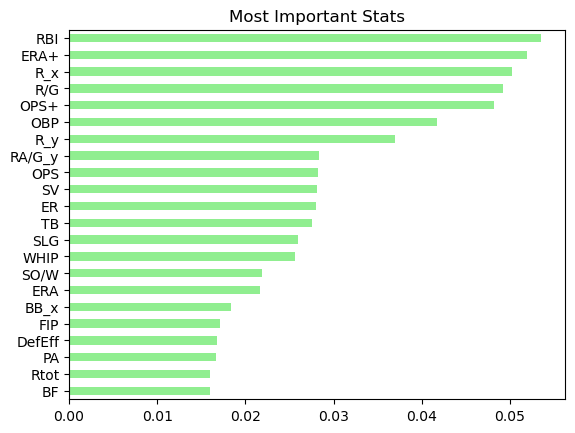

In [17]:
# Visualize the features by importance

feature_importances_df.rename(columns={0: 'feature importances'}, inplace=True)
importances_sorted = feature_importances_df.sort_values(by='feature importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Most Important Stats', ylabel='', legend=False)